In [1]:
import pandas as pd

import tensorflow as tf


In [7]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5606263903278802019
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5752881152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18038939628240957843
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


## Model with augmentation and shuffle = True ( Which makes a huge difference)

## Do not augment validation data as we are only testing on it

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

train_datagen_augmented = ImageDataGenerator(rescale= 1 / 255.,
                                            rotation_range = 0.2,
                                            shear_range = 0.2,
                                            zoom_range = 0.2,
                                            width_shift_range = 0.2,
                                            height_shift_range = 0.3,
                                            horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)



## Model input with flow from directory 

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

train_datagen_augmented = ImageDataGenerator(rescale= 1 / 255.,
                                            rotation_range = 0.2,
                                            shear_range = 0.2,
                                            zoom_range = 0.2,
                                            width_shift_range = 0.2,
                                            height_shift_range = 0.3,
                                            horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   batch_size =64,
                                                                  target_size = (224, 224),
                                                                  class_mode = 'binary',
                                                                  shuffle = True)

# You don't need to train_data it's just to check the comparision of images in the below function

train_data = valid_datagen.flow_from_directory(directory = train_dir,
                                           batch_size = 32,
                                           target_size = (224,224),
                                            class_mode = 'binary',
                                            seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                           batch_size = 64,
                                           target_size = (224,224),
                                           class_mode = 'binary',
                                            seed = 42)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Just to check the images  -- If you want to view images in above train_data_augmented,

### Remove shuffle_true (But this is just to view images if shuffle_true is removed then 

### it will effect the training drastically)

In [4]:
images , lables = train_data.next()

augmented_images , augmented_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

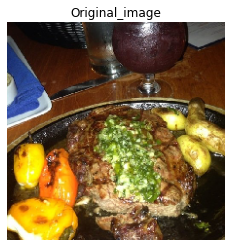

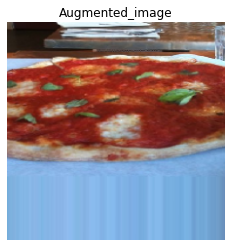

In [5]:
import random 
import matplotlib.pyplot as plt

random_number = random.randint(0,32)

plt.imshow(images[random_number])

plt.title(f'Original_image')

plt.axis(False)

plt.figure()

plt.imshow(augmented_images[random_number])

plt.title (f'Augmented_image')

plt.axis(False)

## Importing all the layers 

In [6]:
import tensorflow as tf

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPool2D, Activation

from tensorflow.keras import Sequential

In [8]:
model_1 = Sequential([
    Conv2D(filters = 20,
          kernel_size = (2,2),
          strides = (1,1),
          padding = 'valid',
          activation = 'relu',
          input_shape = (224,224, 3)),
    Conv2D(30, 3, activation = 'relu'),
   
    MaxPool2D(pool_size = 2),
    Conv2D(20, 3, activation = 'relu' ),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation ='sigmoid')
])

model_1.compile(loss='binary_crossentropy',
               optimizer = Adam(),
               metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)
                                                       )

history_1 = model_1.fit (train_data_augmented,
                        epochs = 10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks = [lr_scheduler])

Epoch 1/10
24/24 [==============================] - 20s 536ms/step - loss: 0.6803 - accuracy: 0.6153 - val_loss: 0.6396 - val_accuracy: 0.7080 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 12s 499ms/step - loss: 0.6458 - accuracy: 0.6400 - val_loss: 0.5710 - val_accuracy: 0.7700 - lr: 1.1220e-04
Epoch 3/10
 9/24 [==========>...................] - ETA: 6s - loss: 0.6176 - accuracy: 0.6684

KeyboardInterrupt: 

## Check the learning rate

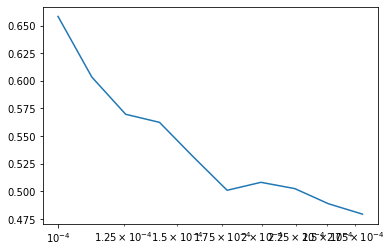

In [50]:
import matplotlib.pyplot as plt

plt.semilogx(history_1.history['lr'],history_1.history['loss'])

## Check if the model is overfitting

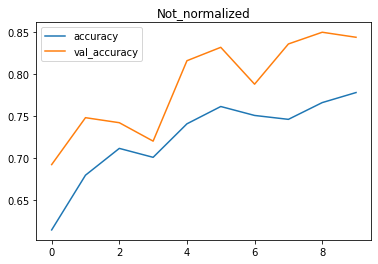

In [52]:
import pandas as pd

a = pd.DataFrame(history_1.history)
c = a.loc[:,['accuracy','val_accuracy']].plot(title = 'Not_normalized')

## Change the learning rate as per the above graph and add the early stopping , dropout layers 

In [ ]:
model_2 = Sequential([
    Conv2D(filters = 20,
          kernel_size = (2,2),
          strides = (1,1),
          padding = 'valid',
          activation = 'relu',
          input_shape = (224,224, 3)),
    Conv2D(30, 3, activation = 'relu'),
   
    MaxPool2D(pool_size = 2),
    Conv2D(20, 3, activation = 'relu' ),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation ='sigmoid')
])


model2.compile(loss = tf.keras.losses.binary_crossentropy,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.4),
             metrics = ['Accuracy'])

ES = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights='True'
)
                                                       

history_2 = model_1.fit (train_data_augmented,
                        epochs = 10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks = [ES])

## check if the model is overfitting

In [ ]:
import pandas as pd

a = pd.DataFrame(history_1.history)
c = a.loc[:,['accuracy','val_accuracy']].plot(title = 'Not_normalized')